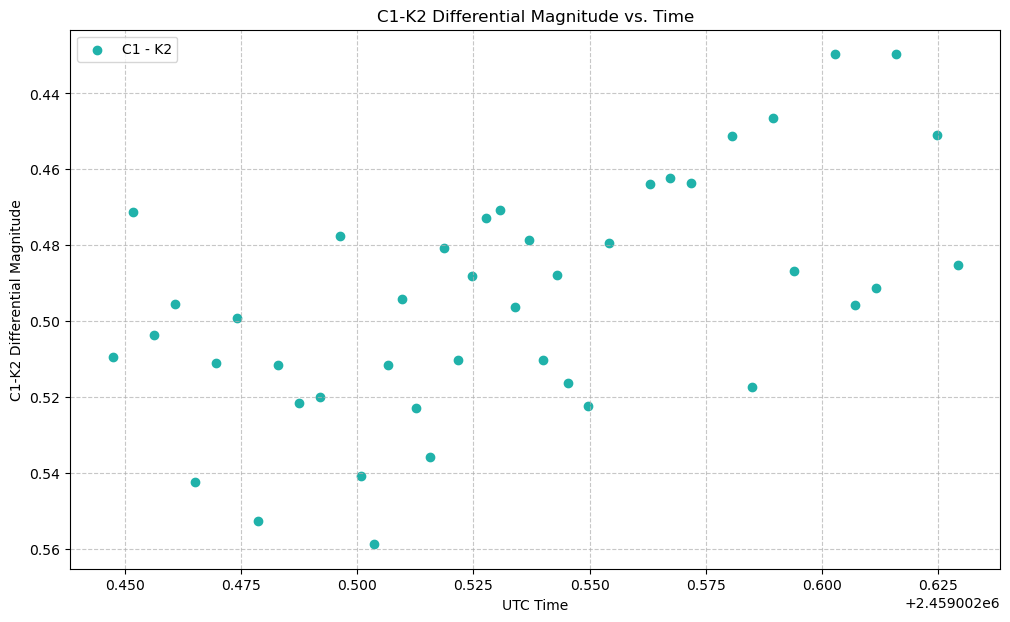

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import datetime
data = np.loadtxt('c1-k2.txt')
hjd = data[:, 0]
v_c_mag = data[:, 1]


times_utc = Time(hjd, format='jd').to_datetime()
t0 = times_utc[0]

hours_from_start = np.array([(t - t0).total_seconds() / 3600.0 for t in times_utc])




min_idx = np.argmax(v_c_mag)
min_time = times_utc[min_idx]
min_value = v_c_mag[min_idx]

plt.figure(figsize=(12, 7))
plt.scatter(times_utc, v_c_mag, marker = 'o', color= 'lightseagreen', label='C1 - K2')
plt.xlabel('UTC Time')
plt.ylabel('C1-K2 Differential Magnitude')
plt.title('C1-K2 Differential Magnitude vs. Time')
plt.legend()


#Place an arrow at the minimum
plt.annotate(
    f'MINIMA: {min_value:.2f} at {min_time.strftime("%Y-%m-%d %H:%M:%S")}',
    xy=(min_time, min_value),
    xytext=(min_time, min_value - 0.01),  # shift text slightly below
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)

plt.gca().invert_yaxis()
plt.grid(alpha=0.7, ls='--')
plt.gcf().autofmt_xdate()
plt.show()


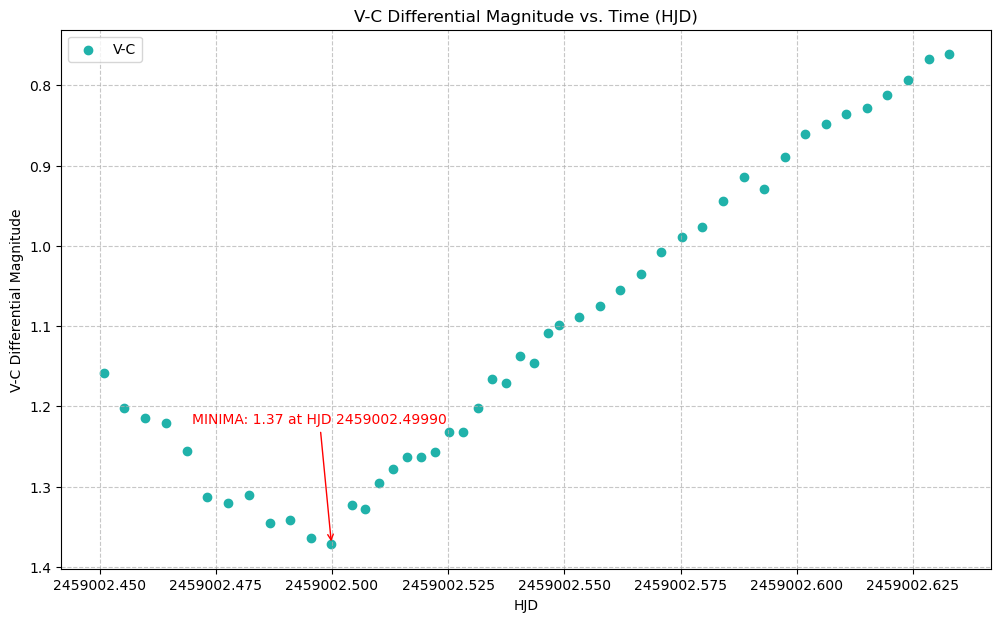

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import matplotlib.ticker as ticker

# Load data
data = np.loadtxt('corr_V-C.txt')
hjd = data[:, 0]       # HJD values
v_c_mag = data[:, 1]   # C1-K2 differential magnitude

# Identify minimum (or maximum) index in v_c_mag
min_idx = np.argmax(v_c_mag)
min_time = hjd[min_idx]
min_value = v_c_mag[min_idx]

# Create plot
plt.figure(figsize=(12, 7))
plt.scatter(hjd, v_c_mag, marker='o', color='lightseagreen', label='V-C')
plt.xlabel('HJD')
plt.ylabel('V-C Differential Magnitude')
plt.title('V-C Differential Magnitude vs. Time (HJD)')
plt.legend()

# Place an arrow at the minimum
plt.annotate(
    f'MINIMA: {min_value:.2f} at HJD {min_time:.5f}',
    xy=(min_time, min_value),
    xytext=(min_time - 0.03, min_value - 0.15),
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)

# Invert y-axis so that brighter magnitudes (numerically smaller) appear higher
plt.gca().invert_yaxis()

# Format x-axis to avoid scientific notation
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
# OR, use a custom formatter (choose one approach)
# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))

plt.grid(alpha=0.7, ls='--')
plt.show()



In [6]:
# File paths
input_file = 'c-k.txt'  # Input file with three columns
output_file = 'c-k1.txt'  # Output file with results

# Process the file
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        columns = line.split()
        if len(columns) >= 3:  # Ensure there are at least 3 columns
            x = float(columns[0])
            y = float(columns[1])
            z = float(columns[2])
            result = x - z
            outfile.write(f"{result} {y}\n")

print(f"New file '{output_file}' created with results.")



ValueError: could not convert string to float: 'O-C'

In [3]:
# Open the file and read the lines
with open('observ.txt', 'r') as file:
    data = [line.strip().split() for line in file]

# Convert first column to a list of floats (assuming numeric data)
data = [(float(row[0]), row[1]) for row in data]

# Find the row with the minimum value in the first column
min_row = min(data, key=lambda x: x[0])
max_row = max(data, key=lambda x: x[0])
# Print the results
print(f"Minima in Mag: {min_row[0]}")
print(f"Error in mag: {min_row[1]}")
print(f"Maxima in Mag: {max_row[0]}")
print(f"Error in mag: {max_row[1]}")


Minima in Mag: 8.73428
Error in mag: 0.00411
Maxima in Mag: 9.34465
Error in mag: 0.00773


In [15]:
import pandas as pd

# File paths (ensure these files are in the same directory as the script or provide full paths)
observations_file = 'observ.txt'  # Your observed data file
vsx_file = 'vsx.txt'                    # VSX ephemeris data file
output_file = 'oc_results.txt'          # Output file for O-C results

P = 8.458255  # days

observed_min_HJD = 2459002.6292514
observed_min_mag = 8.73428
observed_min_mag_err = 0.00411
observed_max_HJD = 2459002.4963663
observed_max_mag = 9.34465
observed_max_mag_err = 0.00773


# ----------------------------
# Step 1: Read the Observed Data
# ----------------------------

# Define column names for clarity
observed_columns = ['HJD', 'Mag', 'Error']

# Read the observed data into a DataFrame
observed_df = pd.read_csv(
    observations_file,
    sep='\s+',               # Space-separated
    header=None,             # No header row
    names=observed_columns   # Assign column names
)

# ----------------------------
# Step 2: Read the VSX Ephemeris Data
# ----------------------------

# Define column names based on VSX file structure
vsx_columns = ['Min_HJD', 'Epoch', 'B-R_d']

# Read the VSX data into a DataFrame
vsx_df = pd.read_csv(
    vsx_file,
    sep='\s+',            # Space-separated
    header=None,          # No header row
    names=vsx_columns     # Assign column names
)

# ----------------------------
# Step 3: Extract Ephemeris Parameters
# ----------------------------

# Lowest HJD in the vsx
T0 = 2425321.599

# You already have the period P (8.458255 days)

print(f"Reference Epoch (T0): {T0}")
print(f"Period (P): {P} days")

# ----------------------------
# Step 4: Calculate Epoch (E) for Each Observed Event
# ----------------------------

# Epoch (E) is the integer number of periods since T0
observed_df['Epoch'] = ((observed_df['HJD'] - T0) / P).round().astype(int)

# ----------------------------
# Step 5: Calculate Calculated HJD (C)
# ----------------------------

# Calculated HJD based on epoch
observed_df['C'] = T0 + observed_df['Epoch'] * P

# ----------------------------
# Step 6: Calculate O-C
# ----------------------------

# O-C = Observed HJD - Calculated HJD
observed_df['O-C'] = observed_df['HJD'] - observed_df['C']

# ----------------------------
# Step 7: Assign Error to O-C
# ----------------------------

# Assuming the uncertainty is only in the observed HJD
# Hence, O-C_Error is the same as the observed Error
observed_df['O-C_Error'] = observed_df['Error']

# ----------------------------
# Step 8: Save the Results
# ----------------------------

# Select relevant columns for output
output_columns = ['HJD', 'Epoch', 'C', 'O-C', 'O-C_Error']

# Save to a new text file with tab separation
observed_df.to_csv(
    output_file,
    columns=output_columns,
    sep='\t',
    index=False,
    float_format='%.6f'
)

print(f"O-C calculations completed. Results saved to '{output_file}'.")


Reference Epoch (T0): 2425321.599
Period (P): 8.458255 days
O-C calculations completed. Results saved to 'oc_results.txt'.


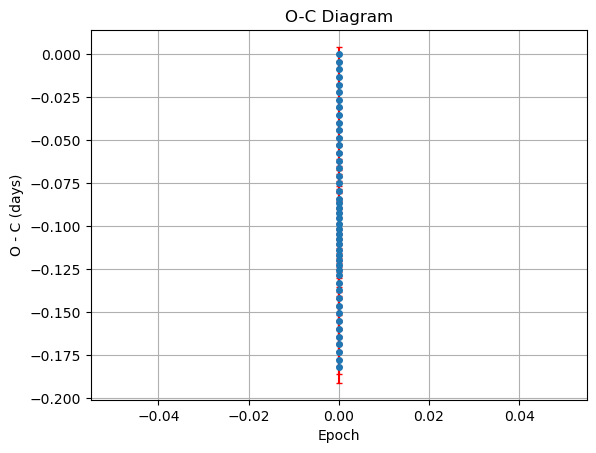

O-C diagram has been plotted and saved as 'oc_diagram.png'.


In [13]:
import matplotlib.pyplot as plt

# Plot O-C vs Epoch
plt.errorbar(observed_df['Epoch'], observed_df['O-C'], yerr=observed_df['O-C_Error'], fmt='o', ecolor='red', capsize=2, markersize=4)
plt.xlabel('Epoch')
plt.ylabel('O - C (days)')
plt.title('O-C Diagram')
plt.grid(True)
plt.savefig('oc_diagram.png')  # Saves the plot as a PNG file
plt.show()

print("O-C diagram has been plotted and saved as 'oc_diagram.png'.")


In [33]:
import pandas as pd

# ----------------------------------------------------------------
# File paths (ensure these files are in the same directory or use full paths)
# ----------------------------------------------------------------
observations_file = 'observ.txt'   # Your observed data file
vsx_file = 'vsx.txt'               # VSX ephemeris data file
output_file = 'oc_results.txt'     # Output file for O-C results

# Star's known period (days)
P = 8.458255

# Optional single-event data (currently unused in calculations):
observed_min_HJD     = 2459002.6292514
observed_min_mag     = 8.73428
observed_min_mag_err = 0.00411
observed_max_HJD     = 2459002.4963663
observed_max_mag     = 9.34465
observed_max_mag_err = 0.00773

# ----------------------------------------------------------------
# Step 1: Read Observed Data
# ----------------------------------------------------------------
observed_columns = ['HJD', 'Mag', 'Error']  # Assign column names for clarity

observed_df = pd.read_csv(
    observations_file,
    sep='\s+',     # Space-separated
    header=None,   # No header row
    names=observed_columns
)

# ----------------------------------------------------------------
# Step 2: Read the VSX Ephemeris Data
# ----------------------------------------------------------------
vsx_columns = ['Min_HJD', 'Epoch', 'B-R_d']
vsx_df = pd.read_csv(
    vsx_file,
    sep='\s+',     # Space-separated
    header=None,
    names=vsx_columns
)

# ----------------------------------------------------------------
# Step 3: Define Reference Epoch (T0)
# ----------------------------------------------------------------
T0 = 2425321.599  # Reference minimum HJD from VSX

print(f"Reference Epoch (T0): {T0}")
print(f"Period (P): {P} days")

# ----------------------------------------------------------------
# Step 4: Calculate Epoch (E) for Each Observed Event
# ----------------------------------------------------------------
# Calculate Epoch numbers
observed_df['Epoch'] = ((observed_df['HJD'] - T0) / P).round().astype(int)

# Verify the range of Epoch values
print(f"Epoch values range from {observed_df['Epoch'].min()} to {observed_df['Epoch'].max()}")

# ----------------------------------------------------------------
# Step 5: Calculate Calculated HJD (C)
# ----------------------------------------------------------------
observed_df['C'] = T0 + observed_df['Epoch'] * P

# ----------------------------------------------------------------
# Step 6: Calculate O-C
# ----------------------------------------------------------------
observed_df['O-C'] = observed_df['HJD'] - observed_df['C']

# ----------------------------------------------------------------
# Step 7: Assign Error to O-C
# ----------------------------------------------------------------
# Assuming the uncertainty is the same as the observed Error column:
observed_df['O-C_Error'] = observed_df['Error']

# ----------------------------------------------------------------
# Step 8: Save the Results
# ----------------------------------------------------------------
output_columns = ['HJD', 'Epoch', 'C', 'O-C', 'O-C_Error']
observed_df.to_csv(
    output_file,
    columns=output_columns,
    sep='\t',
    index=False,
    float_format='%.6f'
)

print(f"O-C calculations completed.\nResults saved to '{output_file}'.")


Reference Epoch (T0): 2425321.599
Period (P): 8.458255 days
Epoch values range from 3982 to 3982
O-C calculations completed.
Results saved to 'oc_results.txt'.


In [34]:
import math

# ----------------------------
# Configuration Section
# ----------------------------

# Period of the variable star (days)
P = 8.458255

# Reference epoch (T0) from VSX (earliest observed minimum HJD)
T0 = 2425321.599

# Observed Minimum Data
observed_min_HJD = 2459002.6292514
observed_min_mag = 8.73428
observed_min_mag_err = 0.00411

# ----------------------------
# Calculation Section
# ----------------------------

# Step 1: Calculate the Epoch (E)
# E is the integer number of periods since T0
E = round((observed_min_HJD - T0) / P)

# Step 2: Calculate the Calculated HJD (C) based on Epoch
C = T0 + E * P

# Step 3: Calculate O-C
OC = observed_min_HJD - C

# ----------------------------
# Output Section
# ----------------------------

# Print the results
print("O-C Calculation for Observed Minimum:")
print(f"Observed Min HJD : {observed_min_HJD}")
print(f"Calculated Min HJD: {C:.6f}")
print(f"O-C Value        : {OC:.6f} days")
print(f"Uncertainty (±)  : {observed_min_mag_err} days")


O-C Calculation for Observed Minimum:
Observed Min HJD : 2459002.6292514
Calculated Min HJD: 2459002.370410
O-C Value        : 0.258841 days
Uncertainty (±)  : 0.00411 days
